# Title: Discover Neighborhood with Your Favorite Restaurant

## 1. Introduction / Business Problem

Often time, you get tired of the restaurants in your neighborhood. You want to try other restaurants, but you don't have a certain restaurant to go to. Where should you start? In this report, neighborhoods in jersey city were clustered based on the restaurant-style, this can give you a guide on which neighborhoods to go that most fit your style. Don't hesitate and just follow the guidance.

## 2. Data Requirement and Collection

The development of the work is based on two datasets. The first dataset is the information of all neighborhoods in jersey city including postal code, name, latitude, and longitude. This dataset will be generated by scraping from Wikipedia. The second dataset is about the number of restaurants with different styles in the neighborhood. This dataset is mainly used for clustering. It will be generated using the Foursquare API.

### 2.1 Scrape information of Jersey city neighborhood from wikipedia 

The information we are scraping is specifically name of each neighborhood in the jersey city. BeautifulSoup is used to scrape the information. The scaped information is organized in a dataframe with eventually three attributes: Neighborhood, Latitude and Longitude.

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

# Initialize the dataframe
columns = ['Neighborhood', 'Latitude', 'Longitude']
df = pd.DataFrame(columns = columns)

html_doc = urlopen('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Jersey_City,_New_Jersey').read()
soup = BeautifulSoup(html_doc, 'html.parser')

# Get the neiborhood list of jersey city and add to the dataframe
i = 0
for lis in soup.find_all('ul'):
    for sublis in lis.find_all('ul'):
        for itm in sublis.find_all('li'):
            df.loc[i] = {'Neighborhood' : itm.a.get('title'), 'Latitude' : -1.00, 'Longitude' : -1.00}
            i += 1

# Remove places that are not neighborhood of jersey city
index = []
for i in range(df.shape[0]):
    if "New Jersey" in df.loc[i,'Neighborhood']:
        index.append(i)
df = df.drop(index, axis = 0)
df = df.reset_index(drop = True)

# Remove duplicates
df = df.drop_duplicates()
df = df.reset_index(drop = True)
df

# Standardize the name of neighborhood by adding Jersey City if not present
for i in range(df.shape[0]):
    if "Jersey City" not in df.loc[i,'Neighborhood']:
        df.loc[i,'Neighborhood'] += ', Jersey City'
df

,Neighborhood,Latitude,Longitude
0,"Beacon, Jersey City",-1.0,-1.0
1,"Bergen Hill, Jersey City",-1.0,-1.0
2,"Communipaw, Jersey City",-1.0,-1.0
3,"Jackson Hill, Jersey City",-1.0,-1.0
4,"Chelsea, Jersey City",-1.0,-1.0
5,"Sparrow Hill, Jersey City",-1.0,-1.0
6,"Palisade Avenue (Hudson Palisades), Jersey City",-1.0,-1.0
7,"Western Slope, Jersey City",-1.0,-1.0
8,"Grove Street (Hudson County), Jersey City",-1.0,-1.0
9,"Harsimus, Jersey City",-1.0,-1.0


### 2.2 Add longitude and latitude of each neighborhood

Geopy package is used to obtain the longitude and latitude of each neighborhood. the data was then added to the dataframe df. Neighborhoods whose location were not found were directly removed from the dataframe.

In [2]:
try:
    from geopy.geocoders import Nominatim
except:
    !pip install geopy
    from geopy.geocoders import Nominatim


geolocator = Nominatim(user_agent='get location')
for i in range(df.shape[0]):
    address = df.loc[i, 'Neighborhood']
    location = geolocator.geocode(address)
    
    try:
        df.loc[i,'Latitude'] = location.latitude
        df.loc[i,'Longitude'] = location.longitude
    except:
        continue
        
# Drop the Neighborhoods that were not found
for i in range(df.shape[0]):
    if df.loc[i,'Latitude'] == -1:
        df = df.drop(i)
df = df.reset_index(drop = True)
df

,Neighborhood,Latitude,Longitude
0,"Beacon, Jersey City",40.721760,-74.063835
1,"Bergen Hill, Jersey City",40.729269,-74.065697
2,"Communipaw, Jersey City",40.708713,-74.060975
3,"Jackson Hill, Jersey City",39.845115,-74.822940
4,"Chelsea, Jersey City",39.354558,-74.449022
5,"Grove Street (Hudson County), Jersey City",40.715927,-74.043220
6,"Harsimus, Jersey City",40.722516,-74.037199
7,"Boyle Plaza, Jersey City",40.654940,-74.219540
8,"Van Vorst Park, Jersey City",40.718066,-74.047158
9,"The Village, Jersey City",40.728158,-74.077642


### 2.3 Visualize neighborhoods on the map

The neighborhood is visualized on the map by using folium package. This provides us with a direct sense of where those neighborhoods locates. Neighborhood that are actually not in Jersey City is removed and also neighborhoods that actually share the same coordinates are joined.

In [4]:
try:
    import folium
except:
    !conda install -c conda-forge folium=0.5.0 --yes
    import folium
    
# Create map of  using latitude and longitude values
address = 'Jersey City'
location = geolocator.geocode(address)
map_JerseyCity = folium.Map(location =[location.latitude, location.longitude], zoom_start=11)
# Add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_JerseyCity)
map_JerseyCity

In [5]:
# Remove a neighborhood that is not in jersey city based on distance
from geopy.distance import geodesic
des = geolocator.geocode('Jersey City')
des = (des.latitude, des.longitude)
distance = []
for lat, lng in zip(df['Latitude'], df['Longitude']):
    temploc = (lat, lng)
    distance.append(geodesic(des, temploc).miles)
df['Distance'] = distance

In [6]:
# Join neighborhood which shares the same distance
def combine(df):
    return ','.join(df.values)
df2 = df.groupby(['Distance','Latitude','Longitude'])['Neighborhood'].apply(combine)
df2 = df2.reset_index()
df2 = df2.drop(df2[df2['Distance'] > 5].index.tolist())
df2

,Distance,Latitude,Longitude,Neighborhood
0,0.000000,40.728158,-74.077642,"The Village, Jersey City,West End, Jersey City..."
1,0.533171,40.735380,-74.074030,"Marion, Jersey City"
2,0.592971,40.724107,-74.087604,"Lincoln Park/West Bergen, Jersey City"
3,0.631688,40.729269,-74.065697,"Bergen Hill, Jersey City"
4,0.848632,40.721760,-74.063835,"Beacon, Jersey City"
5,1.115897,40.739824,-74.062919,"Croxton, Jersey City"
6,1.601821,40.708713,-74.060975,"Communipaw, Jersey City"
7,1.745254,40.718066,-74.047158,"Van Vorst Park, Jersey City"
8,1.906460,40.711027,-74.106133,"Droyer's Point, Jersey City"
9,1.994429,40.715927,-74.043220,"Grove Street (Hudson County), Jersey City"


In [7]:
# Create the map again with processed data
address = 'Jersey City'
location = geolocator.geocode(address)
map_JerseyCity = folium.Map(location =[location.latitude, location.longitude], zoom_start=11)
# add markers to map
for lat, lng, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_JerseyCity)
map_JerseyCity

### 2.4 Get nearby restaurants from Foursquare

Foursquare API is used to get nearby restaurants, including their name, coordinates and categories. Explore endpoint is used and explore radius is set to be 300 meters. A new dataframe is generated to store the venues data.

In [1]:
# Define foursquare id, secret and version
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [9]:
import requests
import json
# Get nearby restaurants
venues = []
for i in df2.index:
    lat = df2.loc[i,'Latitude']
    lng = df2.loc[i,'Longitude']
    name = df2.loc[i,'Neighborhood']
    radius = 300

    # create URL to get food venues that are in the neighborhood within a radius of 300 meters
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    lat,
    lng,
    radius,
    'food')

    # Get the result
    venues_result = requests.get(url).json()['response']['groups'][0]['items']
    venues.append([(
    name,
    lat,
    lng,
    v['venue']['name'], 
    v['venue']['location']['lat'], 
    v['venue']['location']['lng'],  
    v['venue']['categories'][0]['name']) for v in venues_result])

venues
    

[[('The Village, Jersey City,West End, Jersey City,The Hilltop, Jersey City,The Island, Jersey City',
   40.7281575,
   -74.0776417,
   'Fiesta Grill',
   40.72792812989834,
   -74.07594525500372,
   'Filipino Restaurant'),
  ('The Village, Jersey City,West End, Jersey City,The Hilltop, Jersey City,The Island, Jersey City',
   40.7281575,
   -74.0776417,
   'Gusto Latino',
   40.725868685310374,
   -74.07720954100294,
   'Latin American Restaurant'),
  ('The Village, Jersey City,West End, Jersey City,The Hilltop, Jersey City,The Island, Jersey City',
   40.7281575,
   -74.0776417,
   'Alnoor',
   40.726788,
   -74.076239,
   'Middle Eastern Restaurant'),
  ('The Village, Jersey City,West End, Jersey City,The Hilltop, Jersey City,The Island, Jersey City',
   40.7281575,
   -74.0776417,
   'Samakmak Seafood',
   40.72678312741893,
   -74.07642781734467,
   'Seafood Restaurant'),
  ('The Village, Jersey City,West End, Jersey City,The Hilltop, Jersey City,The Island, Jersey City',
   40.72

In [26]:
# put the venues in the dataframe
venue_columns = ['Neighborhood', 'Neighborhood_lat', 'Neighborhood_lng', 'Venue', 'Venue_lat', 'Venue_lng', 'Venue_category']
Venue_df = pd.DataFrame([item for venue_list in venues for item in venue_list], columns = venue_columns)
Venue_df.head(5)

,Neighborhood,Neighborhood_lat,Neighborhood_lng,Venue,Venue_lat,Venue_lng,Venue_category
0,"The Village, Jersey City,West End, Jersey City...",40.728158,-74.077642,Fiesta Grill,40.727928,-74.075945,Filipino Restaurant
1,"The Village, Jersey City,West End, Jersey City...",40.728158,-74.077642,Gusto Latino,40.725869,-74.077210,Latin American Restaurant
2,"The Village, Jersey City,West End, Jersey City...",40.728158,-74.077642,Alnoor,40.726788,-74.076239,Middle Eastern Restaurant
3,"The Village, Jersey City,West End, Jersey City...",40.728158,-74.077642,Samakmak Seafood,40.726783,-74.076428,Seafood Restaurant
4,"The Village, Jersey City,West End, Jersey City...",40.728158,-74.077642,Hwa Kwang Korean restaurant,40.726788,-74.076239,Korean Restaurant


## 3. Cluster the neighborhoods based on restaurant type

Clustering is conducted based on the category attributes.Categorical attributes are transformed to numerical attributes using one-hot method for clustering. The optimal cluster number is found. To better visualize the result, the top 5 most common restaurant types are organized into a new dataframe with cluster label.

In [11]:
# Preprocess the data for clustering
onehot = pd.get_dummies(Venue_df[['Venue_category']], prefix = '', prefix_sep = '')
onehot['Neighborhood'] = Venue_df['Neighborhood']
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped = grouped.set_index('Neighborhood')

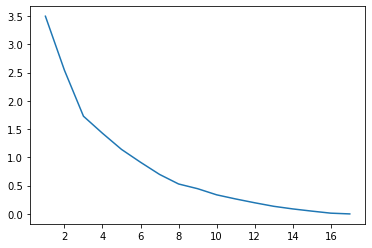

In [14]:
# KMeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine how many clusters we should create
cost = []
for i in range(1, 18):
    kclusters = i
    grouped_cluster = grouped
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_cluster)
    cost.append(kmeans.inertia_)
plt.plot(range(1,18), cost)

In [18]:
# There is an elbow at 8 which is not very clear, anyhow we will use 8 as the number of clusters
kclusters = 8
grouped_cluster = grouped
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_cluster)
kmeans.labels_

array([7, 7, 6, 4, 1, 0, 1, 1, 1, 1, 5, 3, 7, 1, 2, 7, 7], dtype=int32)

In [27]:
# Examine the data, display the top 5 restaurant categories
def get_most_common_food(i, grouped):
    names = grouped.iloc[i]
    names_sorted = names.sort_values(ascending = False)
    return names_sorted.index.values[0:5]
columns = ['No.1', 'No.2','No.3','No.4','No.5']
top_venues = pd.DataFrame(columns = columns, index = grouped.index)
for i in range(grouped.shape[0]):
    top_venues.iloc[i] = get_most_common_food(i, grouped)
top_venues.head(5)

,No.1,No.2,No.3,No.4,No.5
Neighborhood,,,,,
"Beacon, Jersey City",Food Truck,Italian Restaurant,Chinese Restaurant,Deli / Bodega,Diner
"Bergen Hill, Jersey City",Chinese Restaurant,Pizza Place,Fried Chicken Joint,Deli / Bodega,Diner
"Communipaw, Jersey City",Restaurant,Deli / Bodega,Sandwich Place,Caribbean Restaurant,Dumpling Restaurant
"Croxton, Jersey City",Café,Italian Restaurant,South American Restaurant,Turkish Restaurant,Donut Shop
Downtown Jersey City,Food Truck,American Restaurant,Sandwich Place,Café,Pizza Place


In [28]:
# Add labels to the top_venues dataframe and merge with df2 as the final dataframe
top_venues.insert(0,'cluster', kmeans.labels_)

# Merge the results
df_result = df2.join(top_venues, on = 'Neighborhood')

df_result.head(5)

,Distance,Latitude,Longitude,Neighborhood,cluster,No.1,No.2,No.3,No.4,No.5
0,0.000000,40.728158,-74.077642,"The Village, Jersey City,West End, Jersey City...",7.0,Seafood Restaurant,Filipino Restaurant,Latin American Restaurant,Pizza Place,Chinese Restaurant
1,0.533171,40.735380,-74.074030,"Marion, Jersey City",3.0,Deli / Bodega,American Restaurant,Italian Restaurant,Turkish Restaurant,Dumpling Restaurant
2,0.592971,40.724107,-74.087604,"Lincoln Park/West Bergen, Jersey City",5.0,American Restaurant,Breakfast Spot,Fish & Chips Shop,Chinese Restaurant,Turkish Restaurant
3,0.631688,40.729269,-74.065697,"Bergen Hill, Jersey City",7.0,Chinese Restaurant,Pizza Place,Fried Chicken Joint,Deli / Bodega,Diner
4,0.848632,40.721760,-74.063835,"Beacon, Jersey City",7.0,Food Truck,Italian Restaurant,Chinese Restaurant,Deli / Bodega,Diner


## 4. Result and discussion

In this section, the clustered neighborhoods were displayed again in the map and examined, besides the food venues were further explored for each cluster.

In [21]:

import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
address = 'Jersey City'
location = geolocator.geocode(address)
map_cluster = folium.Map(location =[location.latitude, location.longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_result['Latitude'], df_result['Longitude'], df_result['Neighborhood'], df_result['cluster']):
    try:
        label = folium.Popup(str(poi) + ' Cluster ' + str(int(cluster)), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)-1],
            fill=True,
            fill_color=rainbow[int(cluster)-1],
            fill_opacity=0.7).add_to(map_cluster)
    except:
        label = folium.Popup(str(poi) + ' No restaurant', parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='Black',
            fill=True,
            fill_color='Black',
            fill_opacity=0.7).add_to(map_cluster)
       
map_cluster


In [29]:
# Visualize the top 5 categories for each clusters
df_result_sorted = df_result.sort_values('cluster')
df_result_sorted.head(5)

,Distance,Latitude,Longitude,Neighborhood,cluster,No.1,No.2,No.3,No.4,No.5
8,1.906460,40.711027,-74.106133,"Droyer's Point, Jersey City",0.0,Food Truck,Turkish Restaurant,Donut Shop,Fried Chicken Joint,French Restaurant
14,2.373748,40.714979,-74.035875,Downtown Jersey City,1.0,Food Truck,American Restaurant,Sandwich Place,Café,Pizza Place
13,2.367714,40.719498,-74.033999,"Harborside Financial Center, Jersey City",1.0,Food Truck,Gastropub,Sushi Restaurant,Hawaiian Restaurant,Food Court
12,2.283916,40.715308,-74.037549,"Paulus Hook, Jersey City",1.0,American Restaurant,Food Truck,Café,French Restaurant,Turkish Restaurant
10,2.158472,40.722516,-74.037199,"Harsimus, Jersey City",1.0,American Restaurant,Food Truck,Indian Restaurant,Italian Restaurant,Sandwich Place


As shown in the map and dataframe, cluster 1 and 7 have more than 1 neighborhood in the cluster, 6 and 5 respectively. All others only have one neighborhood. Besides, neighborhoods in cluster 1 are all located near the river in the downtown, which is also the most flourishing district. cluster 7 locates in the western area. Both neighborhoods in cluster 1 and cluster 7 are close to each other. For the other clusters who only has one neighborhood. they all located around the edge of jersey city and each neighborhood is very far from each other. As for the top common food categories, restaurants in cluster 7 are more in aisan style including chinese restaurants, japanese restaurants and thai restaurants. Restaurants in cluster 1 have more food truck and american style. 

## Conclusion

This study is to explore and cluster the neighborhoods in jersey city based on the restaurant categories. It can help people find the correct neighborhood for restaurants that best fit their tastes. There are 2 major conclusion:
1. Neighborhoods that are close to each other have similiar restaurant styles.
2. People who are interested in american food should go to neighborhoods near downtown, and people who are interested in asian food should go to western area of jersey city.